# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [55]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime
import time 
# Import API key
# couldn't read API key from the file, so using the key directly into the file 
#from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

627

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [35]:
#creating placeholder city list
cities_fake = ['New York','Boston']
print(cities_fake)

['New York', 'Boston']


In [58]:
count = 1
sets = 1
apikey = "db4a4537bd6acaa0e43b757947114cd6"
url = "http://api.openweathermap.org/data/2.5/weather?APPID=" + apikey
citydata = []
print("Beginning Data Retrieval     ")
print("-----------------------------")

for city in cities:
    city_url = url + "&q=" + city +"&units=" + "imperial"
    cityresponse = requests.get(city_url).json()    
    try:
        print(f'Processing Record {count} of Set {sets} | {city}')

        latitude = cityresponse["coord"]["lat"]
        longitude = cityresponse["coord"]["lon"]
        maxtemp = cityresponse["main"]["temp_max"]
        humidity = cityresponse["main"]["humidity"]
        cloudiness = cityresponse["clouds"]["all"]
        windspeed = cityresponse["wind"]["speed"]
        citydata.append({"City": city,
                          "Latitude": latitude,
                          "Longitude": longitude,
                          "Max Temp": maxtemp,
                          "Humidity": humidity,
                          "Cloudiness": cloudiness,
                          "Wind Speed": windspeed})
        
    except:
        print("City not found. Skipping...")
    count += 1
    if count == 51:
        sets += 1
        count = 0
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto escondido
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | san luis
Processing Record 4 of Set 1 | ribeira grande
Processing Record 5 of Set 1 | qaanaaq
Processing Record 6 of Set 1 | yaan
Processing Record 7 of Set 1 | port alfred
Processing Record 8 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 9 of Set 1 | dali
Processing Record 10 of Set 1 | georgetown
Processing Record 11 of Set 1 | kahului
Processing Record 12 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 13 of Set 1 | burns lake
Processing Record 14 of Set 1 | kapaa
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | oranjemund
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | bathsheba
Processing Record 19 of Set 1 | gibara
Processing Record 20 of Set 1 | petropavlovsk-kamchatskiy
Processing Record 21 of Set 1 | bluff
Proce

Processing Record 36 of Set 4 | nador
Processing Record 37 of Set 4 | lorengau
Processing Record 38 of Set 4 | tura
Processing Record 39 of Set 4 | poim
Processing Record 40 of Set 4 | paita
Processing Record 41 of Set 4 | ostrovnoy
Processing Record 42 of Set 4 | albany
Processing Record 43 of Set 4 | biltine
Processing Record 44 of Set 4 | ilulissat
Processing Record 45 of Set 4 | camacha
Processing Record 46 of Set 4 | normandin
Processing Record 47 of Set 4 | kortkeros
Processing Record 48 of Set 4 | la ronge
Processing Record 49 of Set 4 | thompson
Processing Record 50 of Set 4 | oksfjord
Processing Record 0 of Set 5 | emerald
Processing Record 1 of Set 5 | rokytne
Processing Record 2 of Set 5 | vaxjo
Processing Record 3 of Set 5 | san rafael
Processing Record 4 of Set 5 | kysyl-syr
Processing Record 5 of Set 5 | celestun
Processing Record 6 of Set 5 | zhaotong
Processing Record 7 of Set 5 | nikolayevskaya
Processing Record 8 of Set 5 | jalu
Processing Record 9 of Set 5 | nome
Pro

Processing Record 22 of Set 8 | kohima
Processing Record 23 of Set 8 | lucatan
City not found. Skipping...
Processing Record 24 of Set 8 | mahebourg
Processing Record 25 of Set 8 | sainte-marie
Processing Record 26 of Set 8 | vianopolis
Processing Record 27 of Set 8 | candido mendes
Processing Record 28 of Set 8 | burica
City not found. Skipping...
Processing Record 29 of Set 8 | hendaye
Processing Record 30 of Set 8 | rio gallegos
Processing Record 31 of Set 8 | magaria
Processing Record 32 of Set 8 | jiazi
Processing Record 33 of Set 8 | energeticheskiy
Processing Record 34 of Set 8 | salalah
Processing Record 35 of Set 8 | bell ville
Processing Record 36 of Set 8 | taunggyi
Processing Record 37 of Set 8 | bay roberts
Processing Record 38 of Set 8 | hobyo
Processing Record 39 of Set 8 | beloha
Processing Record 40 of Set 8 | tibagi
Processing Record 41 of Set 8 | tingrela
City not found. Skipping...
Processing Record 42 of Set 8 | newry
Processing Record 43 of Set 8 | itupiranga
Proc

Processing Record 7 of Set 12 | saint-pierre
Processing Record 8 of Set 12 | ijaki
City not found. Skipping...
Processing Record 9 of Set 12 | sasykoli
Processing Record 10 of Set 12 | vanderhoof
Processing Record 11 of Set 12 | roebourne
Processing Record 12 of Set 12 | chiredzi
Processing Record 13 of Set 12 | aurillac
Processing Record 14 of Set 12 | arawa
Processing Record 15 of Set 12 | mehamn
Processing Record 16 of Set 12 | dhidhdhoo
Processing Record 17 of Set 12 | borsa
Processing Record 18 of Set 12 | salym
Processing Record 19 of Set 12 | hvide sande
Processing Record 20 of Set 12 | manoharpur
Processing Record 21 of Set 12 | barinitas
Processing Record 22 of Set 12 | pierre
Processing Record 23 of Set 12 | leh
Processing Record 24 of Set 12 | manyana
Processing Record 25 of Set 12 | morondava
Processing Record 26 of Set 12 | kununurra
Processing Record 27 of Set 12 | matay
Processing Record 28 of Set 12 | tiarei
Processing Record 29 of Set 12 | unity
Processing Record 30 of

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [59]:
city_df = pd.DataFrame(citydata)
city_df = city_df [["City","Cloudiness","Humidity","Latitude","Longitude","Max Temp","Wind Speed"]]
city_df

,City,Cloudiness,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,puerto escondido,5,70,15.85,-97.07,84.20,17.22
1,jamestown,90,75,42.10,-79.24,44.60,10.29
2,san luis,100,50,-33.30,-66.34,69.64,15.88
3,ribeira grande,51,62,38.52,-28.70,53.42,15.32
4,qaanaaq,99,80,77.48,-69.36,4.77,7.20
...,...,...,...,...,...,...,...
567,bosaso,56,72,11.28,49.18,81.91,8.50
568,uglich,16,76,57.53,38.33,35.69,11.34
569,bilma,0,13,18.69,12.92,91.04,8.14
570,warah,77,21,27.45,67.80,80.26,1.32


In [60]:
city_df['City'] = city_df['City'].str.capitalize() 
city_df.head()

,City,Cloudiness,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Puerto escondido,5,70,15.85,-97.07,84.20,17.22
1,Jamestown,90,75,42.10,-79.24,44.60,10.29
2,San luis,100,50,-33.30,-66.34,69.64,15.88
3,Ribeira grande,51,62,38.52,-28.70,53.42,15.32
4,Qaanaaq,99,80,77.48,-69.36,4.77,7.20


In [61]:
city_df.to_csv(f"../{output_data_file}", index=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

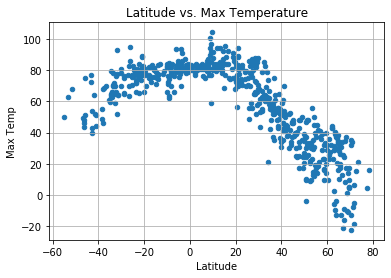

In [62]:
city_df.plot(x = 'Latitude',y = 'Max Temp',kind ='scatter',title="Latitude vs. Max Temperature",grid = True)
plt.savefig("Max_Temp_vs_Latitude.png")
plt.show()

#### Latitude vs. Humidity Plot

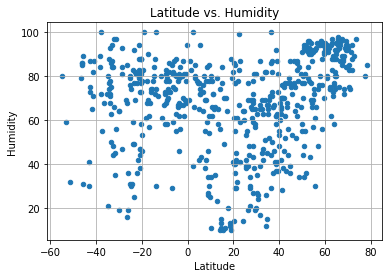

In [63]:
city_df.plot(x = 'Latitude',y = 'Humidity',kind ='scatter',title="Latitude vs. Humidity",grid = True)
plt.savefig("Humidity_vs_Latitude.png")
plt.show()

#### Latitude vs. Cloudiness Plot

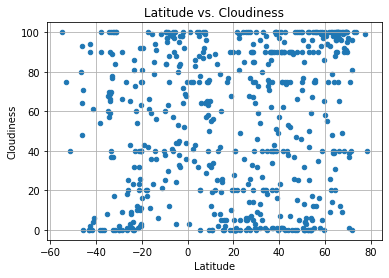

In [64]:
city_df.plot(x = 'Latitude',y = 'Cloudiness',kind ='scatter',title="Latitude vs. Cloudiness",grid = True)
plt.savefig("Cloudiness_vs_Latitude.png")
plt.show()

#### Latitude vs. Wind Speed Plot

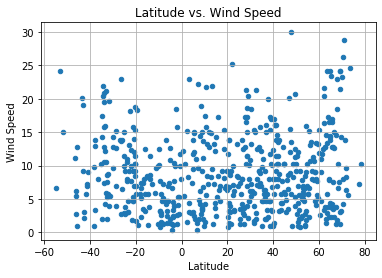

In [65]:
city_df.plot(x = 'Latitude',y = 'Wind Speed',kind ='scatter',title="Latitude vs. Wind Speed",grid = True)
plt.savefig("Wind Speed_vs_Latitude.png")
plt.show()

## Linear Regression

In [66]:
# OPTIONAL: Create a function to create Linear Regression plots

In [67]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = city_df.loc[pd.to_numeric(city_df["Latitude"]).astype(float) > 0, :]
southern_df = city_df.loc[pd.to_numeric(city_df["Latitude"]).astype(float) < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = -1.23x + 98.62
The r-squared is: -0.8905379281130597
The regression displays a negative correlation.
In the nothern hemisphere, temperature decreases as you move away from the equator.


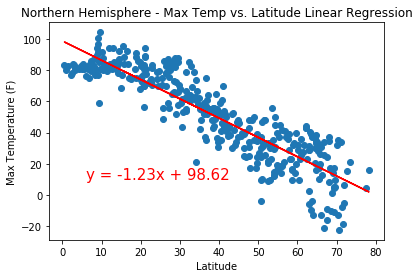

In [68]:
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Max Temp']).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a negative correlation.")
print("In the nothern hemisphere, temperature decreases as you move away from the equator.")
plt.savefig("NH_Max Temp_vs_Latitude_LR.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = 0.54x + 85.29
The r-squared is: 0.6748205230767623
The regression displays a positive correlation.
In the southern hemisphere, temperature increases as you get closer to the equator.


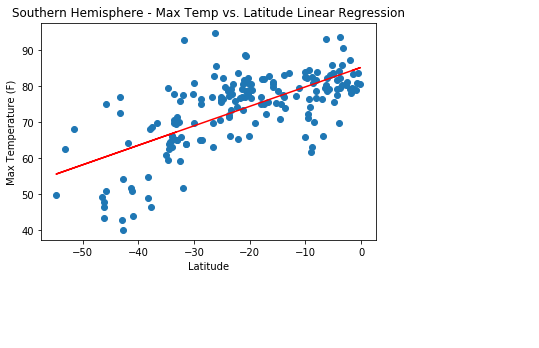

In [69]:
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a positive correlation.")
print("In the southern hemisphere, temperature increases as you get closer to the equator.")
plt.savefig("SH_Max Temp_vs_Latitude_LR.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.53x + 45.82
The r-squared is: 0.46968841252576915
There is a small correlation between humidity and latitude.Humidity increases as you move away from the equator.


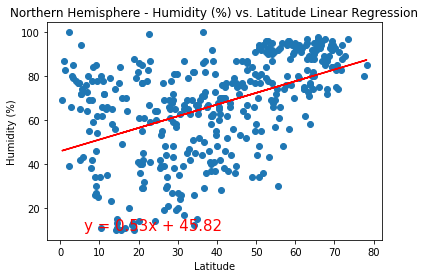

In [71]:

x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("There is a small correlation between humidity and latitude in the Northern Hemisphere. Humidity may increase as you move away from the equator.")
plt.savefig("NH_Humidity_vs_Latitude_LR.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.13x + 72.45
The r-squared is: 0.0910497987398373
There is not much correlation among data points.


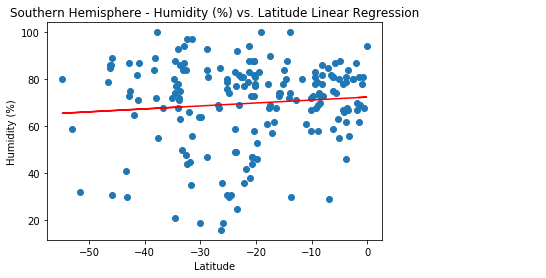

In [72]:
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("There is not much correlation among data points.")
plt.savefig("SH_Humidity_vs_Latitude_LR.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.46x + 34.41
The r-squared is: 0.21946069357983689
There is not much correlation among data points.


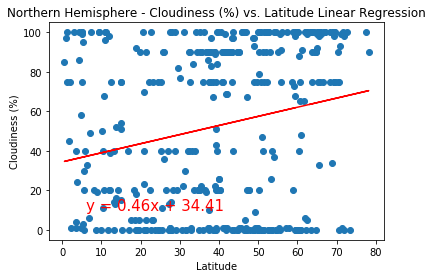

In [42]:
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("There is not much correlation among data points.")
plt.savefig("NH_Cloudiness_vs_Latitude_LR.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.42x + 65.18
The r-squared is: 0.14366738715999702
There is not much correlation among data points.


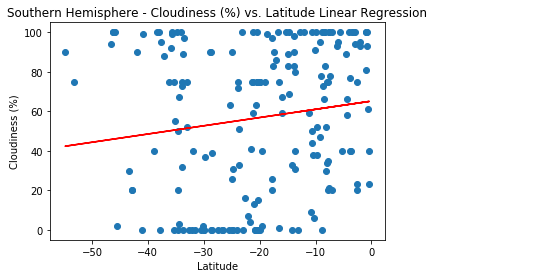

In [43]:
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("There is not much correlation among data points.")
plt.savefig("SH_Cloudiness_vs_Latitude_LR.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = 0.08x + 6.27
The r-squared is: 0.24038477598939997
There is not much correlation among data points.


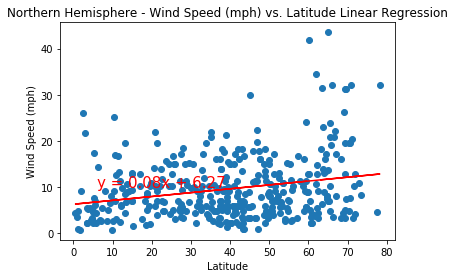

In [44]:
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("There is not much correlation among data points.")
plt.savefig("NH_Wind Speed_vs_Latitude_LR.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = -0.13x + 5.37
The r-squared is: -0.33321175798970093
There is not much correlation among data points.


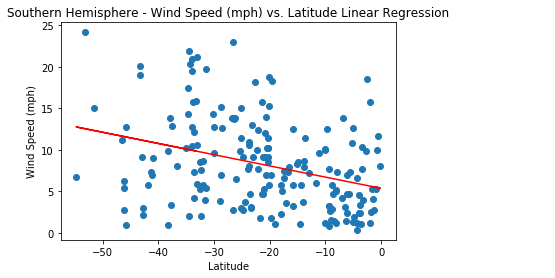

In [73]:
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("There is not much correlation among data points.")
plt.savefig("SH_Wind Speed_vs_Latitude_LR.png")
plt.show()